In [1]:
import pandas as pd
import numpy as np
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
os.path.abspath(".")

'/Users/gracequarterman/rasilab_spelman_2023/data'

In [3]:
data = pd.read_csv('gq_go_output.csv') 

In [4]:
data

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
0,GO:0000398,"mRNA splicing, via spliceosome",2.830000e-24,2.080000e-20,"5.37 (2149,235,80,47)",[+] Show genes
1,GO:0000377,"RNA splicing, via transesterification reaction...",2.830000e-24,1.040000e-20,"5.37 (2149,235,80,47)",[+] Show genes
2,GO:0000375,"RNA splicing, via transesterification reactions",6.510000e-24,1.590000e-20,"5.28 (2149,239,80,47)",[+] Show genes
3,GO:0008380,RNA splicing,8.170000e-20,1.500000e-16,"3.86 (2149,321,92,53)",[+] Show genes
4,GO:0006397,mRNA processing,6.700000e-17,9.860000e-14,"3.57 (2149,369,80,49)",[+] Show genes
...,...,...,...,...,...,...
86,GO:0051234,establishment of localization,7.930000e-04,6.710000e-02,"1.40 (2149,513,291,97)",[+] Show genes
87,GO:0048585,negative regulation of response to stimulus,8.130000e-04,6.790000e-02,"1.82 (2149,155,313,41)",[+] Show genes
88,GO:0006289,nucleotide-excision repair,8.420000e-04,6.960000e-02,"10.41 (2149,24,43,5)",[+] Show genes
89,GO:0070646,protein modification by small protein removal,8.920000e-04,7.290000e-02,"3.07 (2149,41,239,14)",[+] Show genes


In [5]:
#data = pd.read_table('gq_go_output.csv') 

In [6]:
df = pd.read_csv('gq_go_output.csv')

delimiter = ',''()'

split_numbers = df['Enrichment (N, B, n, b)'].str.split(delimiter, expand=True)
df['enrichment'] = df['Enrichment (N, B, n, b)'].str.split(' ', expand=True)[0]

df['Enrichment'] = split_numbers[0]
df['Calculation1'] = split_numbers[1] 
df['Calculation2'] = split_numbers[2] 
df['Calculation3'] = split_numbers[3] 
df['Calculation4'] = split_numbers[4] 

df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000398,"mRNA splicing, via spliceosome",2.830000e-24,2.080000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
1,GO:0000377,"RNA splicing, via transesterification reaction...",2.830000e-24,1.040000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
2,GO:0000375,"RNA splicing, via transesterification reactions",6.510000e-24,1.590000e-20,"5.28 (2149,239,80,47)",[+] Show genes,5.28,5.28 (2149,,239,,80
3,GO:0008380,RNA splicing,8.170000e-20,1.500000e-16,"3.86 (2149,321,92,53)",[+] Show genes,3.86,3.86 (2149,,321,,92
4,GO:0006397,mRNA processing,6.700000e-17,9.860000e-14,"3.57 (2149,369,80,49)",[+] Show genes,3.57,3.57 (2149,,369,,80


In [7]:
# df = pd.read_csv('gq_go_output.csv')

# delimiter = ',''()'

# df['enrichment'] = df['Enrichment (N, B, n, b)'].str.split(' ', expand=True)[0]

# df.head()

In [8]:
# make a new column that is the 'enrichment' rounded to neareset whole number
df['enrichment'] = df.enrichment.astype(float)

In [9]:
df.enrichment.dtype

dtype('float64')

In [10]:
filtered_df= df[df['FDR q-value'] < 0.05]
filtered_df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000398,"mRNA splicing, via spliceosome",2.830000e-24,2.080000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
1,GO:0000377,"RNA splicing, via transesterification reaction...",2.830000e-24,1.040000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
2,GO:0000375,"RNA splicing, via transesterification reactions",6.510000e-24,1.590000e-20,"5.28 (2149,239,80,47)",[+] Show genes,5.28,5.28 (2149,,239,,80
3,GO:0008380,RNA splicing,8.170000e-20,1.500000e-16,"3.86 (2149,321,92,53)",[+] Show genes,3.86,3.86 (2149,,321,,92
4,GO:0006397,mRNA processing,6.700000e-17,9.860000e-14,"3.57 (2149,369,80,49)",[+] Show genes,3.57,3.57 (2149,,369,,80


In [11]:
filtered_df.enrichment.dtype

dtype('float64')

In [12]:
filtered_df_2 = filtered_df[filtered_df['enrichment'] > 2]
filtered_df_2.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000398,"mRNA splicing, via spliceosome",2.830000e-24,2.080000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
1,GO:0000377,"RNA splicing, via transesterification reaction...",2.830000e-24,1.040000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
2,GO:0000375,"RNA splicing, via transesterification reactions",6.510000e-24,1.590000e-20,"5.28 (2149,239,80,47)",[+] Show genes,5.28,5.28 (2149,,239,,80
3,GO:0008380,RNA splicing,8.170000e-20,1.500000e-16,"3.86 (2149,321,92,53)",[+] Show genes,3.86,3.86 (2149,,321,,92
4,GO:0006397,mRNA processing,6.700000e-17,9.860000e-14,"3.57 (2149,369,80,49)",[+] Show genes,3.57,3.57 (2149,,369,,80


In [13]:
len(df) # split enrichment, changed type, rounded enrichment

91

In [14]:
len(filtered_df) # filtered q < 0.05

84

In [15]:
len(filtered_df_2) # enrichment > 2 

69

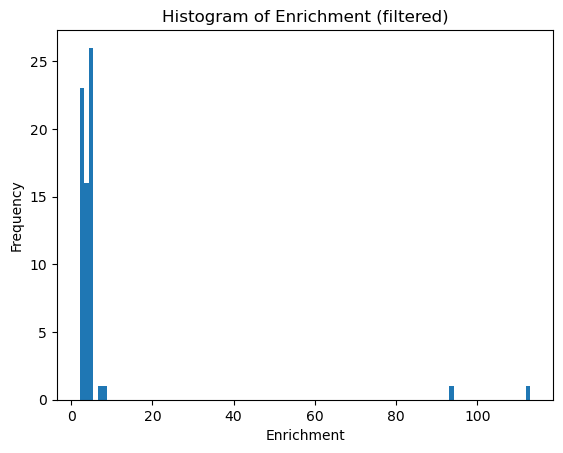

In [16]:
import matplotlib.pyplot as plt

# Create a histogram of the 'enrichment' column in filtered_df_2
plt.hist(filtered_df_2['enrichment'], bins=100)

plt.title('Histogram of Enrichment (filtered)')
plt.xlabel('Enrichment')
plt.ylabel('Frequency')

plt.show()

In [19]:
import matplotlib.pyplot as plt

# Create a histogram of the 'enrichment' column in filtered_df_3
plt.hist(filtered_df_3['enrichment'], bins=20)

plt.title('Histogram of Enrichment (filtered)')
plt.xlabel('Enrichment')
plt.ylabel('Frequency')

plt.show()

NameError: name 'filtered_df_3' is not defined

In [22]:
df = pd.DataFrame(filtered_df_2)

filtered_df_2_sorted_ascending = filtered_df_2.sort_values(by='FDR q-value', ascending=True)

filtered_df_2.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,enrichment,Enrichment,Calculation1,Calculation2,Calculation3,Calculation4
0,GO:0000398,"mRNA splicing, via spliceosome",2.830000e-24,2.080000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
1,GO:0000377,"RNA splicing, via transesterification reaction...",2.830000e-24,1.040000e-20,"5.37 (2149,235,80,47)",[+] Show genes,5.37,5.37 (2149,,235,,80
2,GO:0000375,"RNA splicing, via transesterification reactions",6.510000e-24,1.590000e-20,"5.28 (2149,239,80,47)",[+] Show genes,5.28,5.28 (2149,,239,,80
3,GO:0008380,RNA splicing,8.170000e-20,1.500000e-16,"3.86 (2149,321,92,53)",[+] Show genes,3.86,3.86 (2149,,321,,92
4,GO:0006397,mRNA processing,6.700000e-17,9.860000e-14,"3.57 (2149,369,80,49)",[+] Show genes,3.57,3.57 (2149,,369,,80


In [23]:
filtered_df_2_sorted_ascending.rename(columns={'Calculation2': 'AssociatedGenes'}, inplace=True)

print(filtered_df_2_sorted_ascending.head)

<bound method NDFrame.head of        GO term                                        Description   
1   GO:0000377  RNA splicing, via transesterification reaction...  \
2   GO:0000375    RNA splicing, via transesterification reactions   
0   GO:0000398                     mRNA splicing, via spliceosome   
3   GO:0008380                                       RNA splicing   
4   GO:0006397                                    mRNA processing   
..         ...                                                ...   
76  GO:1905114  cell surface receptor signaling pathway involv...   
80  GO:0016567                             protein ubiquitination   
81  GO:0033554                        cellular response to stress   
82  GO:0006283   transcription-coupled nucleotide-excision repair   
83  GO:1901987          regulation of cell cycle phase transition   

         P-value   FDR q-value Enrichment (N, B, n, b)           Genes   
1   2.830000e-24  1.040000e-20   5.37 (2149,235,80,47)  [+] Show ge

In [24]:
columns_to_drop = ['Calculation1','P-value']  

# Replace with the column names you want to remove
filtered_df_2_sorted_ascending.drop(columns=columns_to_drop, inplace=True)

print(filtered_df_2_sorted_ascending.head())

      GO term                                        Description   
1  GO:0000377  RNA splicing, via transesterification reaction...  \
2  GO:0000375    RNA splicing, via transesterification reactions   
0  GO:0000398                     mRNA splicing, via spliceosome   
3  GO:0008380                                       RNA splicing   
4  GO:0006397                                    mRNA processing   

    FDR q-value Enrichment (N, B, n, b)           Genes  enrichment   
1  1.040000e-20   5.37 (2149,235,80,47)  [+] Show genes        5.37  \
2  1.590000e-20   5.28 (2149,239,80,47)  [+] Show genes        5.28   
0  2.080000e-20   5.37 (2149,235,80,47)  [+] Show genes        5.37   
3  1.500000e-16   3.86 (2149,321,92,53)  [+] Show genes        3.86   
4  9.860000e-14   3.57 (2149,369,80,49)  [+] Show genes        3.57   

   Enrichment AssociatedGenes Calculation3 Calculation4  
1  5.37 (2149             235                        80  
2  5.28 (2149             239                   

In [25]:
filtered_df_2_sorted_ascending.to_csv('gq_splicing_go_table.csv', index=False)